In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [2]:
#Number of data points
N=1000

#Mean and variance of the normal distribution
#from which the data is taken
mu = 5
sigma = 4

#The parameters for the second order polynomial from 
#which the data is to be generated
A=4
B=5
C=9

#alphas for LASSO regression
alphas = np.linspace(start=0.00001, stop=0.1, num=500)

In [3]:
#generating the X data
X = np.random.normal(mu, sigma, size=(N, 1))

#generating the Y data using a second order polynomial
#and adding some gaussian noise
Y = A*X + B*(X**2) + C + np.random.randn(N,1)

#Using the PolynomialFeatures model to 
#generate a 10th order polynomial from our train set
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

#splitting the data into train and test sets
X_train_poly, X_test_poly, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.20, random_state=55)

In [4]:
#creating a linear model and fitting our
#10th order polynomial
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, Y_train)

#fitting the trained model to the test data
Y_pred = lin_reg.predict(X_test_poly)

RMSE = mean_squared_error(Y_pred, Y_test)

print("The mean squared error is", RMSE)

The mean squared error is 0.8596315987756866


Text(0.5, 1.0, 'Error vs. Regularization Coefficient')

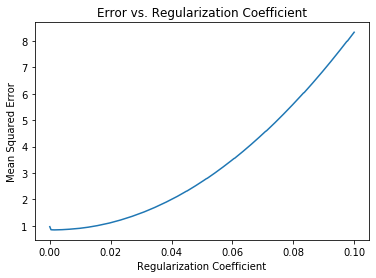

In [5]:
#create the mean squared errors for different values of alpha
RSMEs = []
for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha, fit_intercept=True, normalize=True)
    lasso_reg.fit(X_train_poly, Y_train)
    Y_pred = lasso_reg.predict(X_test_poly)
    RSMEs.append(mean_squared_error(Y_pred, Y_test))

#plotting the error versus the regularization coefficient
plt.plot(alphas, RSMEs)
plt.ylabel("Mean Squared Error")
plt.xlabel("Regularization Coefficient")
plt.title("Error vs. Regularization Coefficient")